# YOLOv8 Nesne Tanıma

## Ortam Hazırlığı

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/YOLOv8/object_detection

/content/drive/MyDrive/YOLOv8/object_detection


In [ ]:
# Ultralyticsi İndir
%pip install ultralytics

import ultralytics
ultralytics.checks()



Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


## Test/Prediction

In [ ]:
!yolo detect predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.23M/6.23M [00:00<00:00, 72.9MB/s]
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 476k/476k [00:00<00:00, 12.1MB/s]
image 1/1 /content/drive/MyDrive/YOLOv8/object_detection/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 290.1ms
Speed: 20.6ms preprocess, 290.1ms inference, 31.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


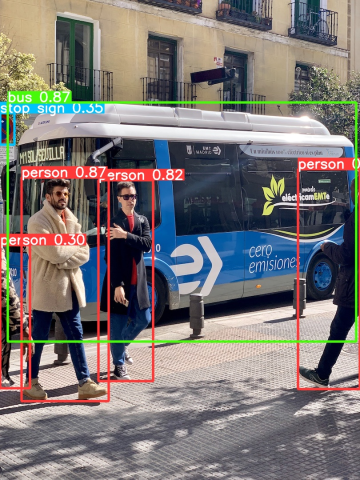

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow
img = cv2.imread("runs/detect/predict/bus.jpg")
img = imutils.resize(img, width=360)
cv2_imshow(img)


0: 640x480 4 persons, 1 bus, 1 stop sign, 189.2ms
Speed: 4.1ms preprocess, 189.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


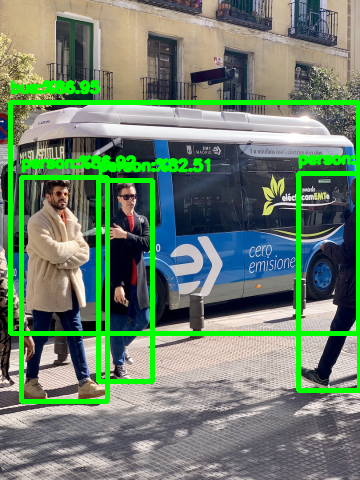

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX
img_path = "bus.jpg"
model_path = "yolov8n.pt"

model = YOLO(model_path)
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)
results = model(img)[0]

threshold = 0.5
for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_idd = int(x1), int(y1), int(x2), int(y2), int(class_id)

  if score > threshold:
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 4)
    class_name = results.names[class_id]
    score = score*100
    text = f"{class_name}:%{score:.2f}"

    cv2.putText(img, text, (x1,y1-10), font, 0.5, (0,255,0), 2, cv2.LINE_AA)
cv2_imshow(img)

## Training

In [ ]:
!unzip data/brain_tumor_dataset.zip -d ./data

Archive:  data/brain_tumor_dataset.zip
   creating: ./data/brain_tumor_dataset/
   creating: ./data/brain_tumor_dataset/images/
   creating: ./data/brain_tumor_dataset/labels/
   creating: ./data/brain_tumor_dataset/images/test/
   creating: ./data/brain_tumor_dataset/images/train/
   creating: ./data/brain_tumor_dataset/images/val/
   creating: ./data/brain_tumor_dataset/labels/test/
   creating: ./data/brain_tumor_dataset/labels/train/
   creating: ./data/brain_tumor_dataset/labels/val/
  inflating: ./data/brain_tumor_dataset/images/test/610.jpg  
  inflating: ./data/__MACOSX/brain_tumor_dataset/images/test/._610.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/360.jpg  
  inflating: ./data/__MACOSX/brain_tumor_dataset/images/test/._360.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/228.jpg  
  inflating: ./data/__MACOSX/brain_tumor_dataset/images/test/._228.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/765.jpg  
  inflating: ./data/__MACOSX/brain_tumo

In [ ]:
!yolo detect train data=data/config.yaml model=yolov8n.pt epochs=25 imgsz=640 workers=8 batch=8 device=0 name=yolov8_brain_tumor_detection

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/config.yaml, epochs=25, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_brain_tumor_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

## Tümor Tespiti

In [ ]:
!yolo detect predict model=runs/detect/yolov8_brain_tumor_detection/weights/best.pt source=inference save=True

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/34 /content/drive/MyDrive/YOLOv8/object_detection/inference/10.jpg: 640x640 (no detections), 10.1ms
image 2/34 /content/drive/MyDrive/YOLOv8/object_detection/inference/104.jpg: 640x640 (no detections), 7.3ms
image 3/34 /content/drive/MyDrive/YOLOv8/object_detection/inference/112.jpg: 640x640 (no detections), 7.3ms
image 4/34 /content/drive/MyDrive/YOLOv8/object_detection/inference/117.jpg: 640x640 (no detections), 8.1ms
image 5/34 /content/drive/MyDrive/YOLOv8/object_detection/inference/13.jpg: 640x640 (no detections), 7.3ms
image 6/34 /content/drive/MyDrive/YOLOv8/object_detection/inference/140.jpg: 640x640 (no detections), 7.3ms
image 7/34 /content/drive/MyDrive/YOLOv8/object_detection/inference/151.jpg: 640x640 (no detections), 7.3ms
image 8/34 /content/drive/MyDrive/YOLOv8/object_detection/inference/168.jpg: 6